### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
data = pd.read_csv("Data.csv")
item = pd.read_csv("item.csv")
user = pd.read_csv("user.csv")

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
print("1. The information of the data dataframe is given below.\n")
data.info()
print("\n\
2. The dimension of data is:")
data.shape
print("3. The following summarizes data: ")
data.describe()
print("4. The number of missing values in data:")
data.isna().sum()

1. The information of the data dataframe is given below.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB

2. The dimension of data is:


(100000, 4)

3. The following summarizes data: 


,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


4. The number of missing values in data:


user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [4]:
print("1. The information of the item dataframe is given below.\n")
item.info()
print("\n\
2. The dimension of item is:")
item.shape
print("3. The following summarizes item: ")
item.describe()
print("4. The number of missing values in item:")
item.isna().sum()

1. The information of the item dataframe is given below.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage

(1681, 22)

3. The following summarizes item: 


,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


4. The number of missing values in item:


movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [5]:
print("1. The information of user dataframe is given below.\n")
data.info()
print("\n\
2. The dimension of user is:")
data.shape
print("3. The following summarizes user: ")
data.describe()
print("4. The number of missing values in user:")
data.isna().sum()

1. The information of user dataframe is given below.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB

2. The dimension of user is:


(100000, 4)

3. The following summarizes user: 


,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


4. The number of missing values in user:


user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [6]:
# use sum on the default axis
number_of_movies = item.sum()[3:]
number_of_movies

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: object

#### 5. Find the movies that have more than one genre - 2.5 marks

In [7]:
#hint: use sum on the axis = 1

sum_genre = item[item.columns[3:]].sum(axis = 1)
item2 =  item[sum_genre>1]
item2['genre_above_1'] = item2[item2.columns[3:]].sum(axis = 1)
item2[['movie title', 'genre_above_1']]

# itemGenres = item.drop(['movie id', 'movie title', 'release date'], axis = 1)
# item[itemGenres.sum(axis=1) > 1]


#Check
print('The minimum number of genre for movies in item2 DataFrame is', min(item2['genre_above_1']))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,movie title,genre_above_1
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
...,...,...
1667,MURDER and murder,3
1668,Tainted,2
1671,Mirage,2
1677,B. Monkey,2


The minimum number of genre for movies in item2 DataFrame is 2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [8]:
drop_movie = item[item['unknown']==1]
item.drop(drop_movie.index, axis = 0, inplace = True)
item

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [9]:
# HINT: use bar plot for rating, countplot/distplot for age; release date and countplot for gender and occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below

In [10]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [42]:
#Merge data, item and user DataFrames
merged = pd.merge(left=data.loc[:, data.columns !='timestamp'], right=item[['movie id','movie title', 'release date']], 
                  how = 'left', on='movie id')
merged1 = pd.merge(left = merged, right=user.loc[:, user.columns!= 'zip code'], 
                   how = 'left', on='user id')

#Extract 'release year' from 'release date'
merged1['release year'] = merged1['release date'].str.slice(start = 7)
merged1.head()

,user id,movie id,rating,movie title,release date,age,gender,occupation,release year
0,196,242,3,Kolya,24-Jan-1997,49,M,writer,1997
1,186,302,3,L.A. Confidential,01-Jan-1997,39,F,executive,1997
2,22,377,1,Heavyweights,01-Jan-1994,25,M,writer,1994
3,244,51,2,Legends of the Fall,01-Jan-1994,28,M,technician,1994
4,166,346,1,Jackie Brown,01-Jan-1997,47,M,educator,1997


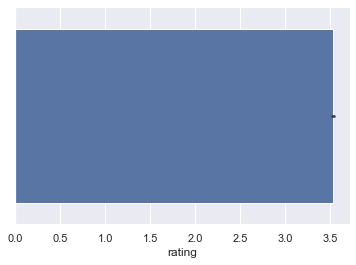

In [342]:
rating=sns.barplot(merged1['rating'])

rating

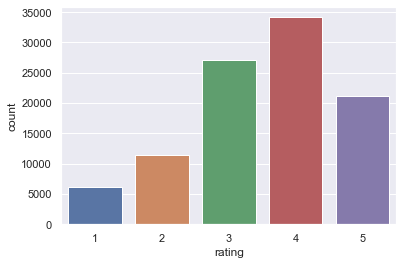

In [343]:
#From Mentor Class
sns.countplot(merged1['rating']) #since rating is categorical

<Figure size 864x720 with 0 Axes>

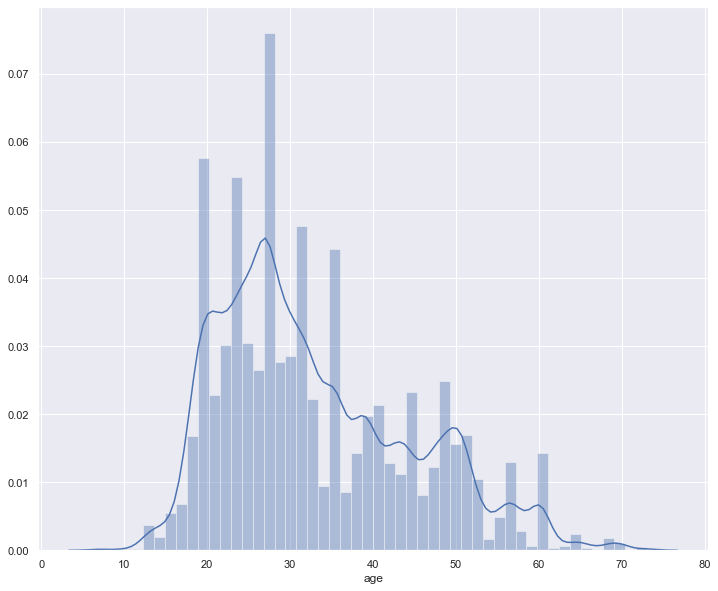

In [55]:
plt.figure(figsize=(12,10))
age = sns.distplot(merged1['age']) #age is continuous


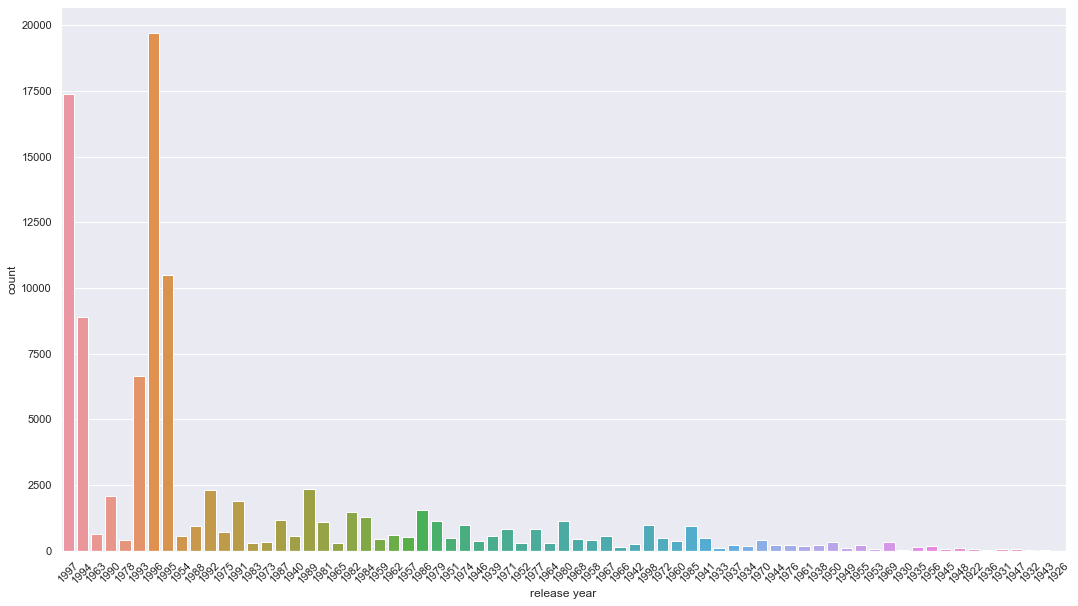

In [67]:
plt.figure(figsize=(18,10))
rls_yr = sns.countplot(merged1['release year'])
rls_yr.set_xticklabels(rls_yr.get_xticklabels(), rotation=45);

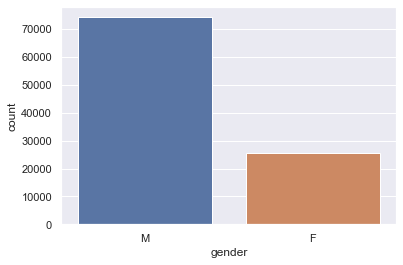

In [48]:
sns.countplot(merged1['gender'])

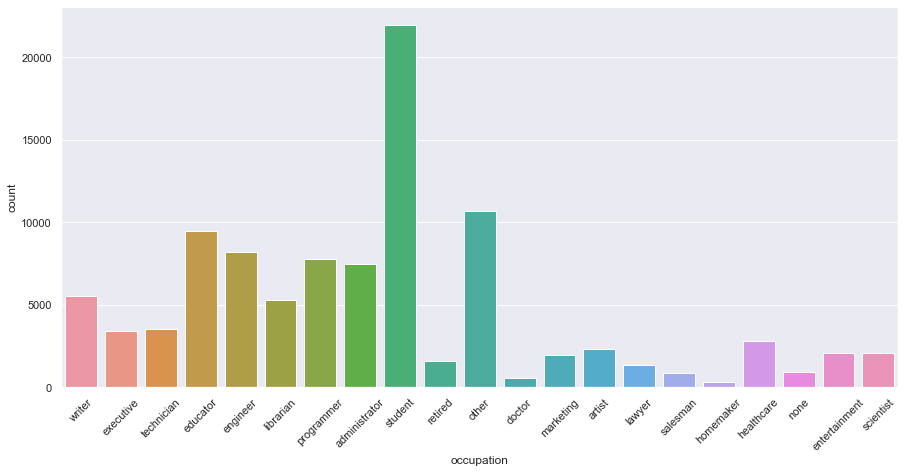

In [66]:
plt.figure(figsize=(15,7))

occ = sns.countplot(merged1['occupation'])
occ.set_xticklabels(occ.get_xticklabels(), rotation=45);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [81]:
#Merge `merged1['release year']` and `item` on 'movie id'

merged2 = pd.merge(left = merged1[['movie id','release year']], 
                   right = item, how = 'left', on = 'movie id')
merged2.head()

,movie id,release year,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,242,1997,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,302,1997,L.A. Confidential,01-Jan-1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,377,1994,Heavyweights,01-Jan-1994,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51,1994,Legends of the Fall,01-Jan-1994,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,346,1997,Jackie Brown,01-Jan-1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
pop_trend = merged2.loc[:,merged2.columns!='movie id'].groupby('release year').sum()
pop_trend.head()

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,,
1922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1931,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0
1932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,12.0,0.0


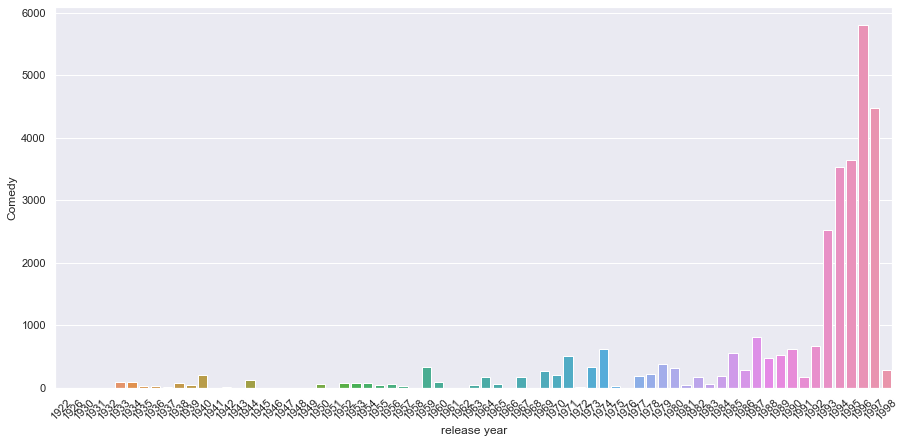

In [141]:
# Comedy trend over the year
plt.figure(figsize=(15,7))
com_trend = sns.barplot(data = pop_trend,x= pop_trend.index, y = 'Comedy')
com_trend.set_xticklabels(com_trend.get_xticklabels(), rotation=45);

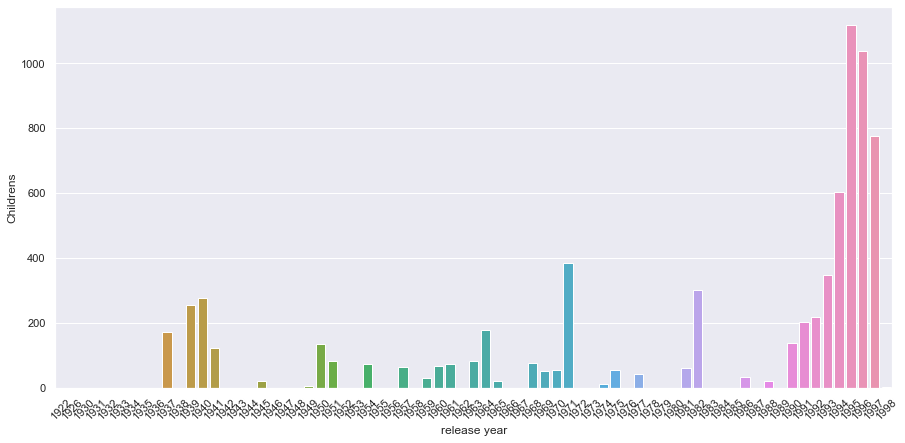

In [142]:
# Childrens genre trend over the years
plt.figure(figsize=(15,7))
chil_trend = sns.barplot(data = pop_trend,x= pop_trend.index, y = 'Childrens')
chil_trend.set_xticklabels(chil_trend.get_xticklabels(), rotation=45);

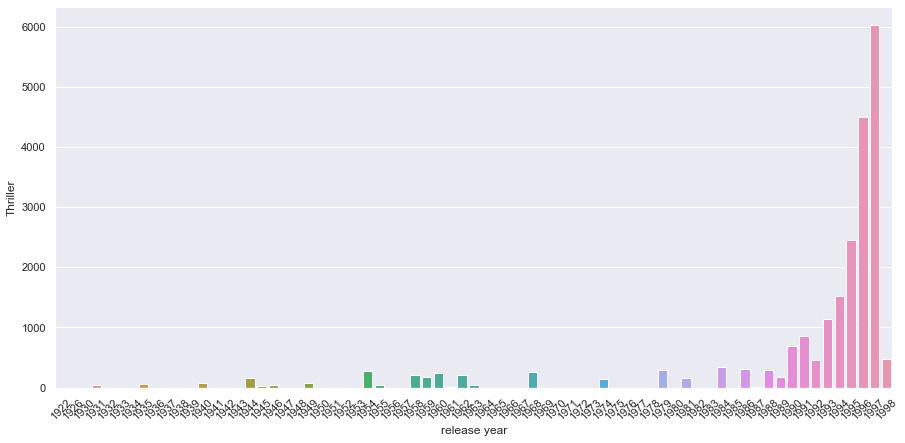

In [143]:
# Thriller genre trend over the years
plt.figure(figsize=(15,7))
thr_trend = sns.barplot(data = pop_trend,x= pop_trend.index, y = 'Thriller')
thr_trend.set_xticklabels(thr_trend.get_xticklabels(), rotation=45);

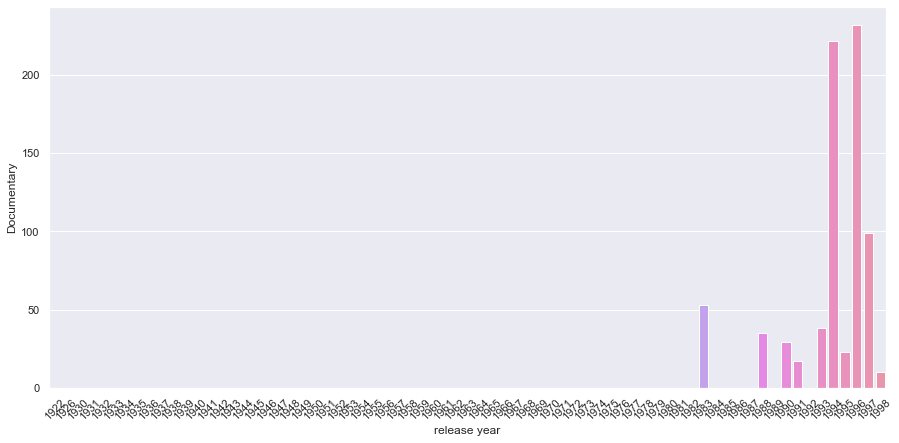

In [144]:
# Documentary genre trend over the years
plt.figure(figsize=(15,7))
doc_trend = sns.barplot(data = pop_trend,x= pop_trend.index, y = 'Documentary')
doc_trend.set_xticklabels(doc_trend.get_xticklabels(), rotation=45);

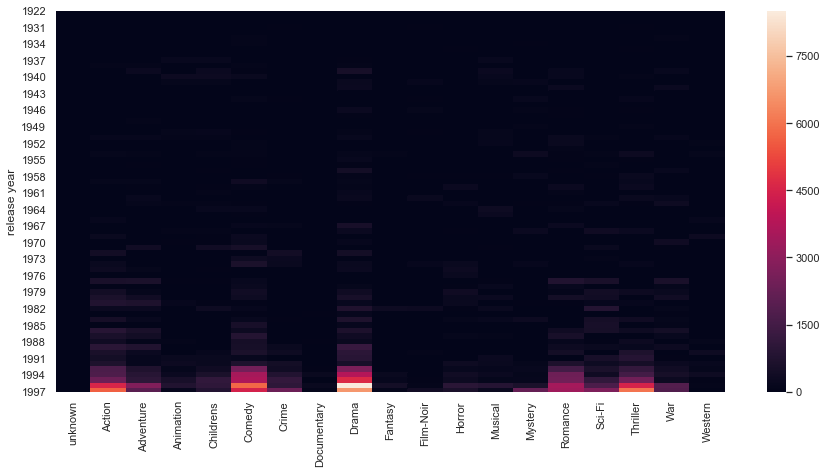

In [138]:
plt.figure(figsize=(15,7))
sns.heatmap(pop_trend);

In [ ]:

item.groupby('release year').sum().drop('')

### 9. Find the top 25 movies, each having a minimum of 100 ratings - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [145]:
merged1.head() 

,user id,movie id,rating,movie title,release date,age,gender,occupation,release year
0,196,242,3,Kolya,24-Jan-1997,49,M,writer,1997
1,186,302,3,L.A. Confidential,01-Jan-1997,39,F,executive,1997
2,22,377,1,Heavyweights,01-Jan-1994,25,M,writer,1994
3,244,51,2,Legends of the Fall,01-Jan-1994,28,M,technician,1994
4,166,346,1,Jackie Brown,01-Jan-1997,47,M,educator,1997


In [174]:
#left out - 
col = merged1[['movie title','rating']]
col_sum = col.groupby('movie title').sum().sort_values(by= 'rating', ascending = False)
col_sum[col_sum['rating']>=100][:25]

,rating
movie title,
Star Wars,2541
Fargo,2111
Return of the Jedi,2032
Contact,1936
Raiders of the Lost Ark,1786
"Godfather, The",1769
"English Patient, The",1759
Toy Story,1753
"Silence of the Lambs, The",1673


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [190]:
merged1.head(2)
item.head(2)

,user id,movie id,rating,movie title,release date,age,gender,occupation,release year
0,196,242,3,Kolya,24-Jan-1997,49,M,writer,1997
1,186,302,3,L.A. Confidential,01-Jan-1997,39,F,executive,1997


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [315]:
gender = merged1[['movie id','gender','rating']]
gender_pref = pd.merge(left = gender, right = item, how = 'left', on = 'movie id')
gender_pref
compare = gender_pref.loc[:,gender_pref.columns!= 'movie id'].groupby('gender').sum()
compare


,movie id,gender,rating,movie title,release date,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,242,M,3,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,302,F,3,L.A. Confidential,01-Jan-1997,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,377,M,1,Heavyweights,01-Jan-1994,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51,M,2,Legends of the Fall,01-Jan-1994,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,346,M,1,Jackie Brown,01-Jan-1997,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,476,M,3,"First Wives Club, The",14-Sep-1996,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,204,F,5,Back to the Future,01-Jan-1985,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99997,1090,M,1,Sliver,01-Jan-1993,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,225,M,2,101 Dalmatians,27-Nov-1996,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,rating,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,,,
F,90901,0.0,5442.0,3141.0,995.0,2232.0,8068.0,1794.0,187.0,11008.0,363.0,385.0,1197.0,1442.0,1314.0,5858.0,2629.0,5086.0,2189.0,371.0
M,262085,0.0,20147.0,10612.0,2610.0,4950.0,21764.0,6261.0,571.0,28887.0,989.0,1348.0,4120.0,3512.0,3931.0,13603.0,10101.0,16786.0,7209.0,1483.0


In [326]:
print("Percentage of women watching different genres of movies are below:")
women =compare.loc['F',:].div(compare.sum())*100
women

print(" ")
print("Percentage of men watching different genres of movies are below:")
men = compare.loc['M',:].div(compare.sum())*100
men

Percentage of women watching different genres of movies are below:


rating         25.752013
unknown              NaN
Action         21.266951
Adventure      22.838653
Animation      27.600555
Childrens      31.077694
Comedy         27.044784
Crime          22.271881
Documentary    24.670185
Drama          27.592430
Fantasy        26.849112
Film-Noir      22.215811
Horror         22.512695
Musical        29.107792
Mystery        25.052431
Romance        30.101228
Sci-Fi         20.652003
Thriller       23.253475
War            23.292190
Western        20.010787
dtype: float64

 
Percentage of men watching different genres of movies are below:


rating         74.247987
unknown              NaN
Action         78.733049
Adventure      77.161347
Animation      72.399445
Childrens      68.922306
Comedy         72.955216
Crime          77.728119
Documentary    75.329815
Drama          72.407570
Fantasy        73.150888
Film-Noir      77.784189
Horror         77.487305
Musical        70.892208
Mystery        74.947569
Romance        69.898772
Sci-Fi         79.347997
Thriller       76.746525
War            76.707810
Western        79.989213
dtype: float64

#### Conclusion:



In [339]:
print('Men watch more drama than women- True')
print(f'The percentage of men that watch Drama is {men.Drama}, while the percentage of women is {women.Drama}')

Men watch more drama than women- True
The percentage of men that watch Drama is 72.40756987091113, while the percentage of women is 27.592430129088857


In [337]:
print('Women watch more Sci-Fi than men - False')
mscifi=men['Sci-Fi']
wscifi=women['Sci-Fi']
print(f'The percentage of men that watch Sci-Fi is {mscifi}, while the percentage of women is {wscifi}')

Women watch more Sci-Fi than men - False
The percentage of men that watch Sci-Fi is 79.34799685781618, while the percentage of women is 20.652003142183815


In [340]:
print('Men watch more Romance than women - True')
print(f'The percentage of men that watch Romance is {men.Romance}, while the percentage of women is {women.Romance}')

Men watch more Romance than women - True
The percentage of men that watch Romance is 69.89877190277993, while the percentage of women is 30.10122809722008
